In [1]:
#Imports
import cv2 as cv
import os
import sys
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Image Enhancement
def power_law_transform(img, c, gamma):
    gray = cv.cvtColor(img, cv.COLOR_RGB2GRAY) #conver to gray
    gray = c*(gray**gamma) # apply power-law function
    gray = (255/(gray.max()-gray.min())*(gray - gray.min())).astype(np.uint8) # convert gray level range to [0,255]
    return gray

#Otsu thresholding
def threshold_green(img):
    lab = cv.cvtColor(img, cv.COLOR_BGR2LAB) # convert to hsv
    a_channel = lab[:,:,1] # store the a-channel
    th = cv.threshold(a_channel,127,255,cv.THRESH_BINARY_INV+cv.THRESH_OTSU)[1] # Automate threshold using Otsu method
    masked = cv.bitwise_and(img, img, mask = th)# Mask the result with the original image
    return masked

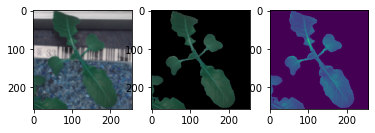

In [24]:
image = cv.imread("data-weed classification/train/charlock/charlock.104.png")#Test Display
#Plot Base image
plt.subplot(1,3,1)
plt.imshow(image)
#Plot darkened image
plt.subplot(1,3,2)
temp = threshold_green(image)
plt.imshow(temp)
#plot removed background
plt.subplot(1,3,3)
plt.imshow(power_law_transform(temp,1,1.5))

In [4]:
#Create lists to store features and labels
RGB_train = []
Hog_train = []
labels_train = []

#Loops Through every image in given dictionary
for root, subFolders, files in os.walk("./data-weed classification/train/"):
    for file in files:
        file_name = root + "/" + file 
        image = cv.imread(file_name)#Reads image
        
        #Enhance - Runs functions
        uncolor = threshold_green(image)
        gray = power_law_transform(uncolor,1,1.5)
        
        rgb = np.mean(np.array(image), axis=(0,1))#Mean Value for Red, Green and Blue
        RGB_train.append(rgb) #Adds RGB to array

        #HOG - Settings
        winSize = (64,64)
        blockSize = (16,16)
        blockStride = (8,8)
        cellSize = (8,8)
        nbins = 9
        derivAperture = 1
        winSigma = 4.
        histogramNormType = 0
        L2HysThreshold = 2.0000000000000001e-01
        gammaCorrection = 0
        nlevels = 64
        hog = cv.HOGDescriptor(winSize,blockSize,blockStride,cellSize,nbins,derivAperture,winSigma,
                                histogramNormType,L2HysThreshold,gammaCorrection,nlevels)
        h = hog.compute(gray)#Caclualtes the HOG
        Hog_train.append(h)#Adds to array
        
        # Extract label from filename
        label = file_name.split("/")[-2] 
        labels_train.append(label)
        

In [5]:
RGB_val = []
Hog_val= []
labels_val = []

#Loops Through every image in given dictionary
for root, subFolders, files in os.walk("./data-weed classification/val/"):
    for file in files:
        file_name = root + "/" + file 
        image = cv.imread(file_name)
        
        #Enhance - Runs functions
        uncolor = threshold_green(image)
        gray = power_law_transform(uncolor,1,1.5)
                
        rgb = np.mean(np.array(image), axis=(0,1))#Mean Value for Red, Green and Blue
        RGB_val.append(rgb) #Adds RGB to array

        #HOG - Settings
        winSize = (64,64)
        blockSize = (16,16)
        blockStride = (8,8)
        cellSize = (8,8)
        nbins = 9
        derivAperture = 1
        winSigma = 4.
        histogramNormType = 0
        L2HysThreshold = 2.0000000000000001e-01
        gammaCorrection = 0
        nlevels = 64
        hog = cv.HOGDescriptor(winSize,blockSize,blockStride,cellSize,nbins,derivAperture,winSigma,
                                histogramNormType,L2HysThreshold,gammaCorrection,nlevels)
        h = hog.compute(gray)#Caclualtes the HOG
        Hog_val.append(h)#Adds to array
        
        # Extract label from filename
        label = file_name.split("/")[-2] 
        labels_val.append(label)

In [6]:
#Create lists to store features and labels
RGB_test = []
Hog_test = []
labels_test = []

#Loops Through every image in given dictionary
for root, subFolders, files in os.walk("./data-weed classification/test/"):
    for file in files:
        file_name = root + "/" + file 
        image = cv.imread(file_name)

        #Enhance - Runs functions
        uncolor = threshold_green(image)
        gray = power_law_transform(uncolor,1,1.5) 

        rgb = np.mean(np.array(image), axis=(0,1))#Mean Value for Red, Green and Blue
        RGB_test.append(rgb)#Adds RGB to array

        #HOG - Settings
        winSize = (64,64)
        blockSize = (16,16)
        blockStride = (8,8)
        cellSize = (8,8)
        nbins = 9
        derivAperture = 1
        winSigma = 4.
        histogramNormType = 0
        L2HysThreshold = 2.0000000000000001e-01
        gammaCorrection = 0
        nlevels = 64
        hog = cv.HOGDescriptor(winSize,blockSize,blockStride,cellSize,nbins,derivAperture,winSigma,
                                histogramNormType,L2HysThreshold,gammaCorrection,nlevels)
        h = hog.compute(gray)#Caclualtes the HOG
        Hog_test.append(h)#Adds to array
        
        # Extract label from filename
        label = file_name.split("/")[-2] 
        labels_test.append(label)

In [7]:
# Convert lists to numpy arrays and checks the shape to make sure they can be stacked.
X_train = np.array(RGB_train)
y_train = np.array(labels_train)
X_train_HOG = np.array(Hog_train)
print(X_train.shape, y_train.shape, X_train_HOG.shape)

(480, 3) (480,) (480, 1102500)


In [8]:
X_val = np.array(RGB_val)
y_val = np.array(labels_val)
X_val_HOG = np.array(Hog_val)
print (X_val.shape, y_val.shape, X_val_HOG.shape)  

(148, 3) (148,) (148, 1102500)


In [9]:
X_test = np.array(RGB_test)
y_test = np.array(labels_test)
X_test_HOG = np.array(Hog_test)
print (X_test.shape, y_test.shape, X_test_HOG.shape)  

(158, 3) (158,) (158, 1102500)


In [10]:
#Combines both features using numpy horizontal stack
Combined_Feat = np.hstack((X_train, X_train_HOG))

In [11]:
Combined_Feat_val = np.hstack((X_val, X_val_HOG))

In [12]:
Combined_Feat_test = np.hstack((X_test, X_test_HOG))

In [27]:
#Imports classifier
from sklearn.svm import SVC

#Bulids Support Vector Machine Classifier
clf = SVC(random_state=0)  

#Trains SVM
clf.fit(Combined_Feat, y_train)

SVC(random_state=0)

In [17]:
#Import Validation
from sklearn.model_selection import cross_val_score

#Performs a 5 fold cross validation on validation set
cross_val_score(clf, Combined_Feat_val, y_val, cv=5, scoring='recall_macro')

array([0.75      , 0.70833333, 0.70833333, 0.62626263, 0.76262626])

In [18]:
# predict the labels in the test dataset
y_test_predict = clf.predict(Combined_Feat_test) 

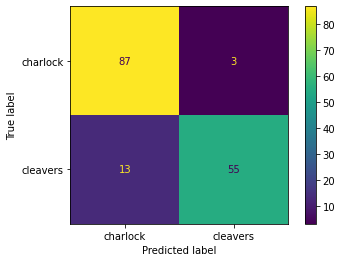

In [20]:
#imports modules for confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

#Creates the confussiuon matrix on predicted and actual labels
cm = confusion_matrix(y_test, y_test_predict, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)

disp.plot()

In [26]:
#Socre the accuracy of the tested data
from sklearn.metrics import accuracy_score
score= accuracy_score(y_test, y_test_predict)
print("Accuracy of Model:", score)

Accuracy of Model: 0.8987341772151899
